# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [584]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [585]:
# Etterspørsel i likning (1)

def x_d(p,t):
    return 500 - 3.2*p*(1+t)

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)



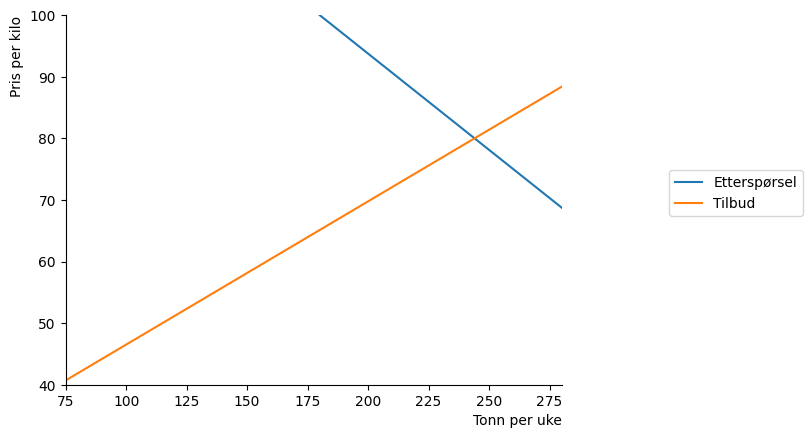

In [586]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?



    Den brattere helningen skyldes at mva øker prisen på tilbudet, og dermed blir tilbudet mindre attraktivt for forbrukeren.
    Dermed blir etterspørselen lavere, og dermed blir tilbudet lavere. Dette gjør at tilbudet blir mer bratt.


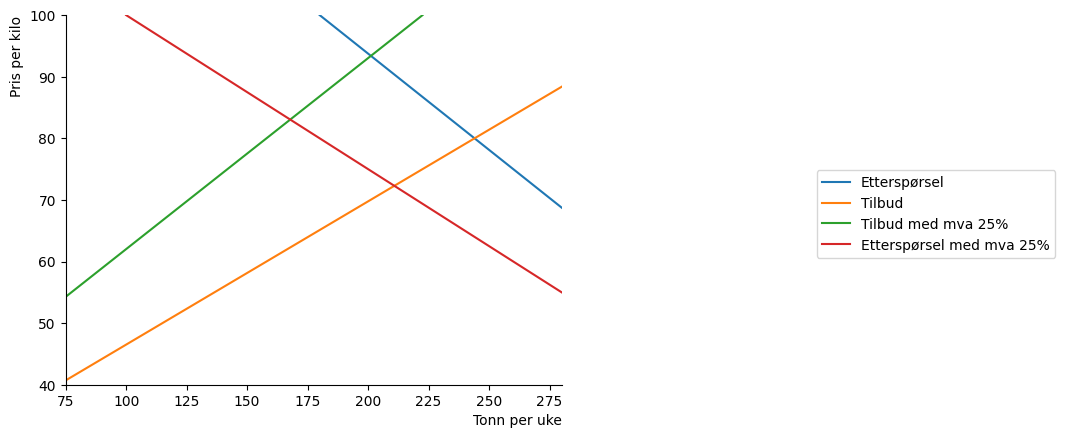

In [587]:
def x_d_2(p,t):
    return 500 - 3.2*p*(1+t)

#Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
#ny funksjon med mva 25%
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med mva 25%')
#ny funksjon med mva 25%
ax.plot(x_d_2(p_num, 0.25),p_num, label='Etterspørsel med mva 25%')
ax.legend(bbox_to_anchor=(1.5,0.6));

print(f'''
    Den brattere helningen skyldes at mva øker prisen på tilbudet, og dermed blir tilbudet mindre attraktivt for forbrukeren.
    Dermed blir etterspørselen lavere, og dermed blir tilbudet lavere. Dette gjør at tilbudet blir mer bratt.''')
fig

In [588]:
#Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.

# definer symboler i sympy

x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p,T),x_s(p,t))
eq_cond


Eq(-3.2*p*(T + 1) + 500, 4.3*p*(1 - t) - 100)

In [589]:
# løs for p
p_eq=sp.solve(eq_cond,p)
p_eq[0]

6000.0/(32.0*T - 43.0*t + 75.0)

In [590]:
# finn tilsvarende kvantum
x_eq=x_s(p_eq[0],t)
x_eq

25800.0*(1 - t)/(32.0*T - 43.0*t + 75.0) - 100

In [591]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)

6000.0/(32.0*T - 43.0*t + 75.0)

In [592]:
# Likevektskvantum som funksjon av t og T

x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

x_eq_fn(t,T)

(25800.0 - 25800.0*t)/(32.0*T - 43.0*t + 75.0) - 100

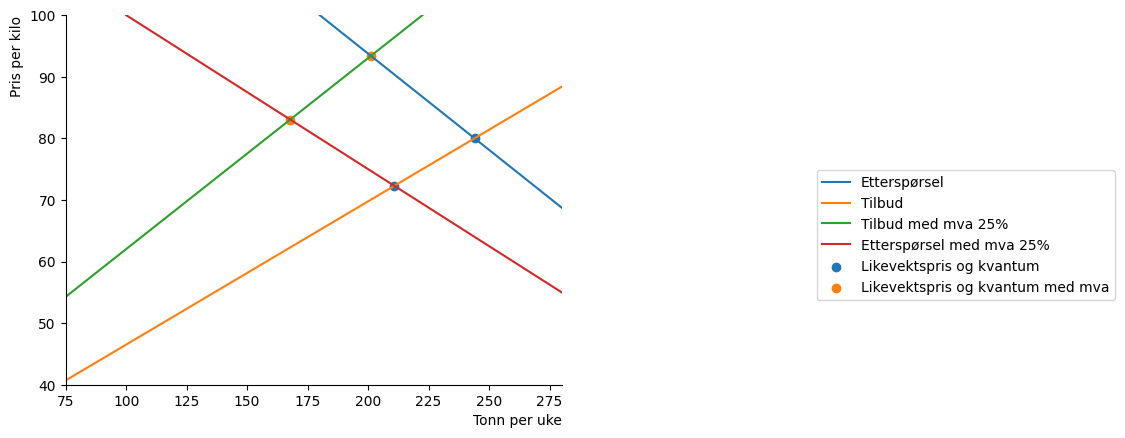

In [593]:
#plot likevektspris og -kvantum
ax.scatter([x_eq_fn(0,0),x_eq_fn(0,0.25)],[p_eq_fn(0,0),p_eq_fn(0,0.25)], label='Likevektspris og kvantum')
ax.scatter([x_eq_fn(0.25,0),x_eq_fn(0.25,0.25)],[p_eq_fn(0.25,0),p_eq_fn(0.25,0.25)], label='Likevektspris og kvantum med mva')
ax.legend(bbox_to_anchor=(1.5,0.6));

fig

In [598]:
#Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.

#statens inntekt
p_0 = p_eq_fn(0,0)
# =80

p_1 = p_eq_fn(0,0.25)
# =72.28

p_2 = p_eq_fn(0.25,0)
# =93.38

stat = p_2 - p_1

konsument = (p_0 - p_1)/(stat)*100
produsent = (p_2 - p_0)/(stat)*100

print(f'''
    Statens inntekt er {round(stat)}kr på varer og tjenester.
    andelen som betales av konsumenter er {round(konsument,2)}% mva. Andelen som produsenten betaler {round(produsent,2)}% mva.''')


    Statens inntekt er 21kr på varer og tjenester.
    andelen som betales av konsumenter er 36.55% mva. Andelen som produsenten betaler 63.45% mva.


In [596]:
#Hva er fordeler/ulemper av en mva og en stykkprisavgift?

print(f'''
    Fordelen med mva er at den er enklere å beregne, og at oftere er mer rettferdig. En ulempe er at alle varer og tjenester blir dyrere.
    Fordelen med stykkprisavgift er at staten får mere makt til å styre prisene på varer og tjenester. En av ulempene med stykkprisavgift
    er at den ofte er mere komplisert å beregne fordi det er mange forskjellige faktorer som påvirker prisen. For eksempel 
    vekt, størrelse, og andre faktorer.''')



    Fordelen med mva er at den er enklere å beregne, og at oftere er mer rettferdig. En ulempe er at alle varer og tjenester blir dyrere.
    Fordelen med stykkprisavgift er at staten får mere makt til å styre prisene på varer og tjenester. En av ulempene med stykkprisavgift
    er at den ofte er mere komplisert å beregne fordi det er mange forskjellige faktorer som påvirker prisen. For eksempel 
    vekt, størrelse, og andre faktorer.
